## Concept Questions
### **Explain the difference between def and async def in FastAPI route handlers. When should you use each?**
FastAPI allows endpoints to be synchronous (def) or asynchronous (async def).

- def (sync)
	- Runs in a thread inside FastAPI’s threadpool.
	- Good for **CPU-bound tasks or when calling blocking I/O libraries** (e.g. **classic SQLAlchemy**, requests).
	- FastAPI automatically uses run_in_threadpool, so it won’t block the event loop.

- async def (async)
	- Runs directly in the event loop.
	- Best for non-blocking I/O, such as:
    	- async database drivers (e.g., encode/databases, Prisma, SQLAlchemy 2 async engine)
	    - async HTTP clients (httpx AsyncClient)
	- Avoid using blocking code inside async functions (e.g. requests), or the event loop stalls.

**Rule of thumb**    
- Use def if you use blocking libraries or CPU-heavy code.
- Use async def when using fully async libraries or need maximum concurrency.



### **What is dependency injection in FastAPI and how does it work behind the scene?**
FastAPI’s DI system lets you declare logic that should run before entering a route.  

How FastAPI DI works:
1.	FastAPI inspects the function signature using type hints and Depends().
2.	It builds a dependency graph.
3.	Before calling the route, FastAPI:
	- resolves dependencies in the correct order
	- calls dependency functions
	- injects returned values into the route handler
4.	Dependencies can be request-scoped or use caching (single-execution per request).

DI enables:   
- clean architecture
- modular code
- shared resources (DB session, auth, config)
- security and validation



### **How does FastAPI achieve automatic API documentation?**  
FastAPI uses:
- Pydantic for data validation / schema generation
- Python type hints for request/response models
- OpenAPI to generate a JSON schema
- Swagger UI / ReDoc to render the documentation automatically

**Flow:**   
1.	FastAPI inspects all endpoints and models.
2.	Builds an OpenAPI schema at GET /openapi.json.
3.	Serves interactive docs at:
	- /docs (Swagger UI)
	- /redoc (ReDoc)
  
No manual documentation needed — everything comes from types and models.



### **Explain the difference between Path, Query, Header, Body, and Cookie parameters in FastAPI.**
FastAPI decides where values come from based on the parameter type:  

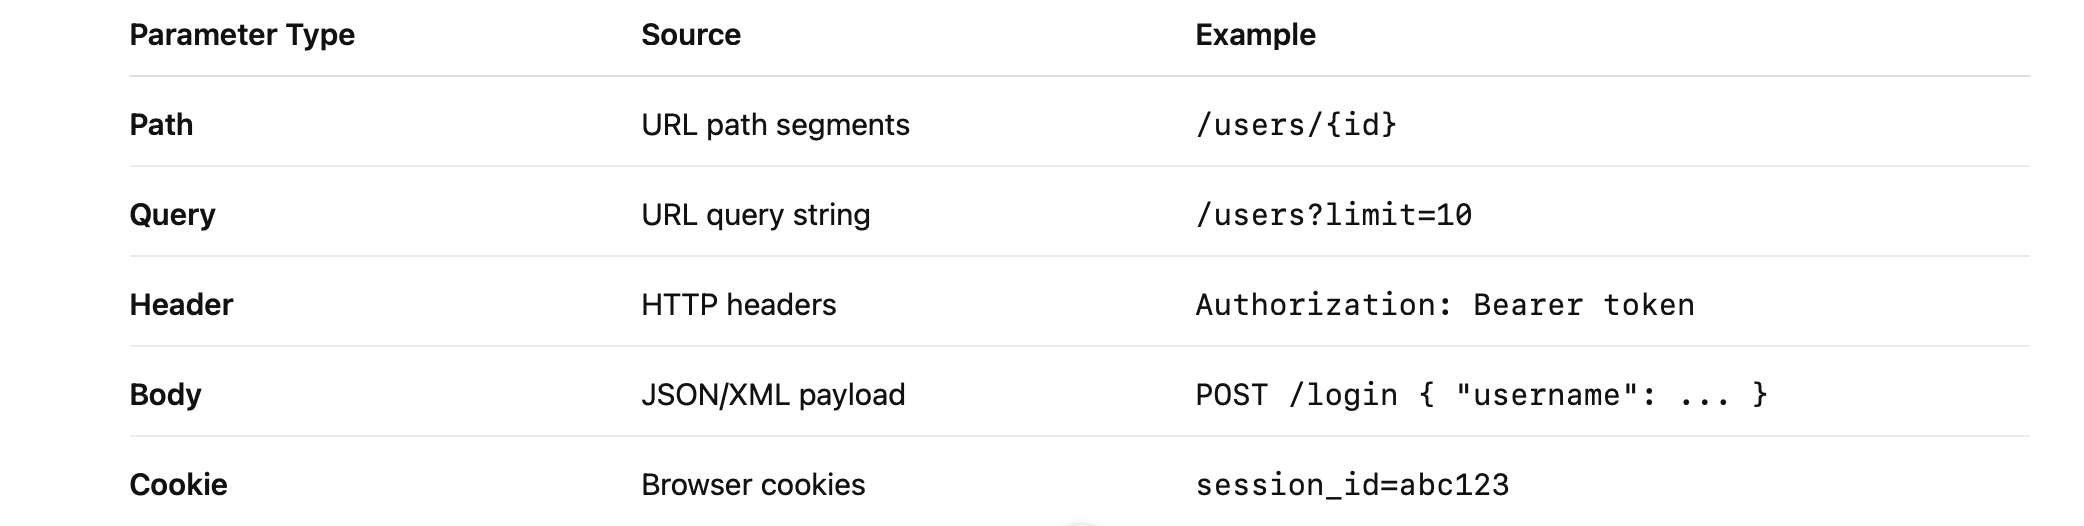



### **What is the purpose of Pydantic models in FastAPI? How do they differ from SQLAlchemy/SQLModel database models?**
**Pydantic models**
- Used for validation, serialization, documentation
- Define request/response schemas
- Not tied to a database
- Enforce strict type checking

**SQLAlchemy / SQLModel models**
- Represent database tables
- Define columns, relationships, indexes
- Responsible for persistence and ORM behavior

Key difference
- Pydantic = data in/out
- SQLAlchemy = data stored

FastAPI encourages using Pydantic for API and SQLAlchemy for DB.




### **Explain how FastAPI's dependency caching works within a single request. Why is this important?**
FastAPI caches dependency results per request.   

If multiple dependencies depend on get_db():
- FastAPI calls get_db() only once per request
- Subsequent injections reuse the same returned object

**Why important?**
- Prevents multiple DB sessions from being created per request
- Improves performance
- Ensures consistency (same object shared across dependencies)
- Avoids unnecessary allocations




### **How does FastAPI handle request validation and what happens when validation fails? How can you customize error responses?**
FastAPI uses Pydantic to validate:
- request body
- path params
- query params
- headers
- cookies

If validation fails:   

FastAPI returns HTTP 422 Unprocessable Entity with a structured JSON error. 

Customizing validation errors by using JSONResponse, defince its status code and content:  
```python
from fastapi.exceptions import RequestValidationError
from fastapi.responses import JSONResponse

@app.exception_handler(RequestValidationError)
async def validation_exception_handler(request, exc):
    return JSONResponse(
        status_code=400,
        content={"error": "Invalid input", "details": exc.errors()}
    )
```



### **Explain the difference between using Annotated[Session, Depends(get_db)] vs Session = Depends(get_db) for type hints. Which is recommended and why?**
Old style:  
```python
def read_users(db: Session = Depends(get_db)):
    ...
```
- Works fine
- But mixes default values with dependency injection
- Type checkers (mypy, PyCharm) sometimes misread it
- Harder to express complex DI

Newer recommended style (PEP-593)   
```python
from typing import Annotated
def read_users(db: Annotated[Session, Depends(get_db)]):
    ...
```
Benefits:
- Cleaner type hints (db is clearly a Session)
- Better support for:
  - IDEs
  - linters
  - OpenAPI generation
- Can attach multiple annotations (examples, metadata)

FastAPI officially recommends Annotated for all new code.    


## Coding Challenge:
# FastAPI Task Management with Weather Forecast
✅ folder: /WeatherForecast_FastAPI